In [1]:
# import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import ticker, cm
import seaborn as sns
from numpy import sqrt, argsort
from tqdm import tqdm, trange

%matplotlib inline

import warnings

warnings.filterwarnings("ignore")

In [2]:
# load the data
data = pd.read_csv('DataSetForThesis2.csv')

del data["Discharge Flow (Nominal m3/hr)"]

# drop the second row
data = data.iloc[1:,:]

# check the missing values
print(f"Missing Values?: {data.isna().sum().any()}")

# drop the missing values
data.dropna(inplace=True)

print(f"Missing Values After Dropping?: {data.isna().sum().any()}")

# check the duplicates
print(f"Number Of Duplicates: {data.duplicated().sum()}")

print(" ")

# change the data type of the columns to float and date time 
cols=[i for i in data.columns if i not in ['Date/Time']]
for col in cols:
    data[col]=pd.to_numeric(data[col])
    
data['Date/Time'] = pd.to_datetime(data['Date/Time'])

data.head()

Missing Values?: True
Missing Values After Dropping?: False
Number Of Duplicates: 0
 


,Date/Time,Suction Pressure (Bar Gauge without Atmospheric pressure),Suction Flow (Nominal m3/hr),Suction Temperature (oC),Dischrage PreG1e without Atmospheric pressure),Discharge Temperature (oC),Gear Box Output Shaft Drive End (DE) X Vibration (μm),Gear Box Output Shaft Drive End (DE) Y Vibration (μm),Gear Box Output Shaft Non Drive End (NDE) X Vibration (μm),Gear Box Output Shaft Non Drive End (NDE) Y Vibration (μm),Gear Box Input Shaft Non Drive End (NDE) X Vibration (μm),Gear Box Input Shaft Drive End (NDE) Y Vibration (μm),Gear Box Input Shaft Drive End (DE) X Vibration (μm),Gear Box Input Shaft Drive End (DE) Y Vibration (μm),Suction Vibration in x,Suction Vibration in y,Discharge Vibration in x,Discharge Vibration in y,Compressor speed (RPM)
1,2020-11-07 00:00:00,5.2,26812.4,28.5,7.4,55.2,3.0,4.0,5.0,6.8,6.6,6.60,6.9,7.4,9.727419,10.204235,7.166746,9.235712,8164.449219
2,2020-11-07 00:20:00,5.2,26836.2,28.4,7.4,55.2,3.0,4.0,5.1,7.0,6.7,6.54,6.8,7.5,9.721112,10.209536,7.135931,9.235712,8161.888184
3,2020-11-07 00:40:00,5.2,26856.7,28.3,7.4,55.2,3.1,4.0,5.3,7.3,6.7,6.46,5.7,7.4,9.714805,10.214835,7.105114,9.178102,8162.304688
4,2020-11-07 01:00:00,5.2,26800.2,28.2,7.4,55.2,3.1,4.0,5.1,7.1,6.8,6.49,7.6,7.4,9.708497,10.220136,7.074298,9.116689,8315.385742
5,2020-11-07 01:20:00,5.2,26852.4,28.1,7.4,55.3,3.1,4.2,5.0,6.7,6.7,6.61,7.6,7.5,9.702189,10.225435,7.043482,9.139559,8217.386719


In [3]:
target='Suction Temperature (oC)'

feature1='Discharge Temperature (oC)' 
feature2='Gear Box Output Shaft Drive End (DE) X Vibration (μm)'
feature3='Suction Vibration in y'
feature4='Compressor speed (RPM)'

#new_data=data[[target, feature1]]
new_data=data[[target, feature1, feature2]]
#new_data=data[[target, feature1, feature2, feature3]]
#new_data=data[[target, feature1, feature2, feature3, feature4]]

new_data

,Suction Temperature (oC),Discharge Temperature (oC),Gear Box Output Shaft Drive End (DE) X Vibration (μm)
1,28.5,55.2,3.0
2,28.4,55.2,3.0
3,28.3,55.2,3.1
4,28.2,55.2,3.1
5,28.1,55.3,3.1
...,...,...,...
26277,30.1,28.4,0.9
26278,30.0,28.2,0.9
26279,29.8,28.0,0.9
26280,29.4,27.9,0.8


In [4]:
values=data.shape[0]
training=0.67 #Use 0.8 for default
what_to_train=values*training

date=data[['Date/Time']]

print("Training Sets")

new_data_train=new_data.iloc[0:int(what_to_train),0:]
new_data_train=new_data_train.astype('float64')

new_data_train.head()

Training Sets


,Suction Temperature (oC),Discharge Temperature (oC),Gear Box Output Shaft Drive End (DE) X Vibration (μm)
1,28.5,55.2,3.0
2,28.4,55.2,3.0
3,28.3,55.2,3.1
4,28.2,55.2,3.1
5,28.1,55.3,3.1


In [5]:
print("Testing Sets")

new_data_test=new_data.iloc[int(what_to_train):,0:]
new_data_test=new_data_test.astype('float64')
new_data_test.reset_index(inplace=True)

new_data_test.head()

Testing Sets


,index,Suction Temperature (oC),Discharge Temperature (oC),Gear Box Output Shaft Drive End (DE) X Vibration (μm)
0,17609,43.9,42.2,0.9
1,17610,44.7,42.3,0.9
2,17611,45.2,42.9,0.9
3,17612,45.0,43.7,0.9
4,17613,44.5,44.4,0.9


In [6]:
print(f"For this case we have {new_data_train.shape[0]} Training Sets and {new_data_test.shape[0]} Training Sets. and we will be focusing on the {target}") 

For this case we have 17608 Training Sets and 8673 Training Sets. and we will be focusing on the Suction Temperature (oC)


In [7]:
from sklearn.preprocessing import StandardScaler
sc1=StandardScaler()
new_data_train_scaled=sc1.fit_transform(new_data_train)
print(new_data_train_scaled.shape)

#What we are going to use for X#
new_data_train_scaled

(17608, 3)


array([[-0.17417057,  1.59592564,  1.64496494],
       [-0.1900556 ,  1.59592564,  1.64496494],
       [-0.20594063,  1.59592564,  1.74319911],
       ...,
       [ 2.01796338,  0.65141574, -0.41795271],
       [ 1.9703083 ,  0.5889688 , -0.41795271],
       [ 2.03384841,  0.5655512 , -0.41795271]])

In [8]:
sc2=StandardScaler()
new_data_train_scaled_y=sc2.fit_transform(new_data_train[[target]])
print(new_data_train_scaled_y.shape)

#What we are going to use for y#
new_data_train_scaled_y

(17608, 1)


array([[-0.17417057],
       [-0.1900556 ],
       [-0.20594063],
       ...,
       [ 2.01796338],
       [ 1.9703083 ],
       [ 2.03384841]])

In [9]:
hops=14 #14 samples
no_records=new_data_train_scaled_y.shape[0]
no_cols=4

X_train=[]
y_train=[]
for i in range(hops, no_records):
    X_train.append(new_data_train_scaled[i-14:i])
    y_train.append(new_data_train_scaled_y[i][0])
X_train, y_train=np.array(X_train), np.array(y_train)

print(X_train.shape)
print(y_train.shape)

(17594, 14, 3)
(17594,)


In [10]:
X_train_shape=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],X_train.shape[2]))
X_train_shape.shape

(17594, 14, 3)

In [11]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model=Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

2023-01-06 10:47:45.600979: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-06 10:47:54.312981: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 14, 50)            10800     
                                                                 
 dropout (Dropout)           (None, 14, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 31,051
Trainable params: 31,051
Non-trainable params: 0
_________________________________________________________________


In [12]:
epochs=100 #set default to 100
batch_size=32

model.fit(X_train_shape, y_train, epochs=epochs, batch_size=batch_size)

Epoch 1/100
550/550 [==============================] - 7s 9ms/step - loss: 0.0685
Epoch 2/100
550/550 [==============================] - 5s 10ms/step - loss: 0.0277
Epoch 3/100
550/550 [==============================] - 5s 9ms/step - loss: 0.0207
Epoch 4/100
550/550 [==============================] - 5s 9ms/step - loss: 0.0175
Epoch 5/100
550/550 [==============================] - 5s 9ms/step - loss: 0.0167
Epoch 6/100
550/550 [==============================] - 5s 9ms/step - loss: 0.0155
Epoch 7/100
550/550 [==============================] - 5s 10ms/step - loss: 0.0151
Epoch 8/100
550/550 [==============================] - 5s 9ms/step - loss: 0.0148
Epoch 9/100
550/550 [==============================] - 5s 9ms/step - loss: 0.0145
Epoch 10/100
550/550 [==============================] - 5s 9ms/step - loss: 0.0143
Epoch 11/100
550/550 [==============================] - 5s 10ms/step - loss: 0.0140
Epoch 12/100
550/550 [==============================] - 5s 9ms/step - loss: 0.0142
Epoch 13/1

In [13]:
new_data_train_last=new_data_train.iloc[-hops:]
new_data_test_full=new_data_test.iloc[:,0:]
full_new_data=pd.concat((new_data_train_last, new_data_test_full),axis=0)
full_new_data=full_new_data.drop(columns='index')
print(full_new_data.shape)
full_new_data.head()

(8687, 3)


,Suction Temperature (oC),Discharge Temperature (oC),Gear Box Output Shaft Drive End (DE) X Vibration (μm)
17595,39.3,35.6,0.9
17596,40.1,36.1,0.9
17597,40.9,37.6,0.9
17598,41.7,39.1,0.9
17599,41.8,40.6,0.9


In [14]:
############### Rescaling the test pandas dataframe #############
full_new_data=sc1.transform(full_new_data)
full_new_data.shape

(8687, 3)

In [15]:
############# Reshaping the test pandas dataframe ###############
hops=14
no_records=full_new_data.shape[0]
no_cols=4
X_train_shape_pred=[]

for i in range(hops,no_records):
    X_train_shape_pred.append(full_new_data[i-hops:i])
X_train_shape_pred=np.array(X_train_shape_pred)
print(X_train_shape_pred.shape)

(8673, 14, 3)


In [16]:
ytest=model.predict(X_train_shape_pred)

272/272 [==============================] - 1s 3ms/step


In [17]:
# y_final_pred=sc2.inverse_transform(ytest)
y_final_pred = sc2.inverse_transform(ytest)
y_final_pred

array([[42.01634 ],
       [43.794125],
       [44.1588  ],
       ...,
       [30.161621],
       [29.884338],
       [29.380365]], dtype=float32)

In [18]:
final_kpi_value_pred=pd.DataFrame(y_final_pred)
final_kpi_value_pred.columns=['final_value_pred']
final_kpi_value_pred

,final_value_pred
0,42.016338
1,43.794125
2,44.158798
3,44.529163
4,44.106815
...,...
8668,30.416563
8669,30.275793
8670,30.161621
8671,29.884338


In [19]:
new_data_test

,index,Suction Temperature (oC),Discharge Temperature (oC),Gear Box Output Shaft Drive End (DE) X Vibration (μm)
0,17609,43.9,42.2,0.9
1,17610,44.7,42.3,0.9
2,17611,45.2,42.9,0.9
3,17612,45.0,43.7,0.9
4,17613,44.5,44.4,0.9
...,...,...,...,...
8668,26277,30.1,28.4,0.9
8669,26278,30.0,28.2,0.9
8670,26279,29.8,28.0,0.9
8671,26280,29.4,27.9,0.8


In [20]:
fully_final=pd.concat((final_kpi_value_pred, new_data_test),axis=1)
fully_final=fully_final[[target, 'final_value_pred']]
fully_final

,Suction Temperature (oC),final_value_pred
0,43.9,42.016338
1,44.7,43.794125
2,45.2,44.158798
3,45.0,44.529163
4,44.5,44.106815
...,...,...
8668,30.1,30.416563
8669,30.0,30.275793
8670,29.8,30.161621
8671,29.4,29.884338


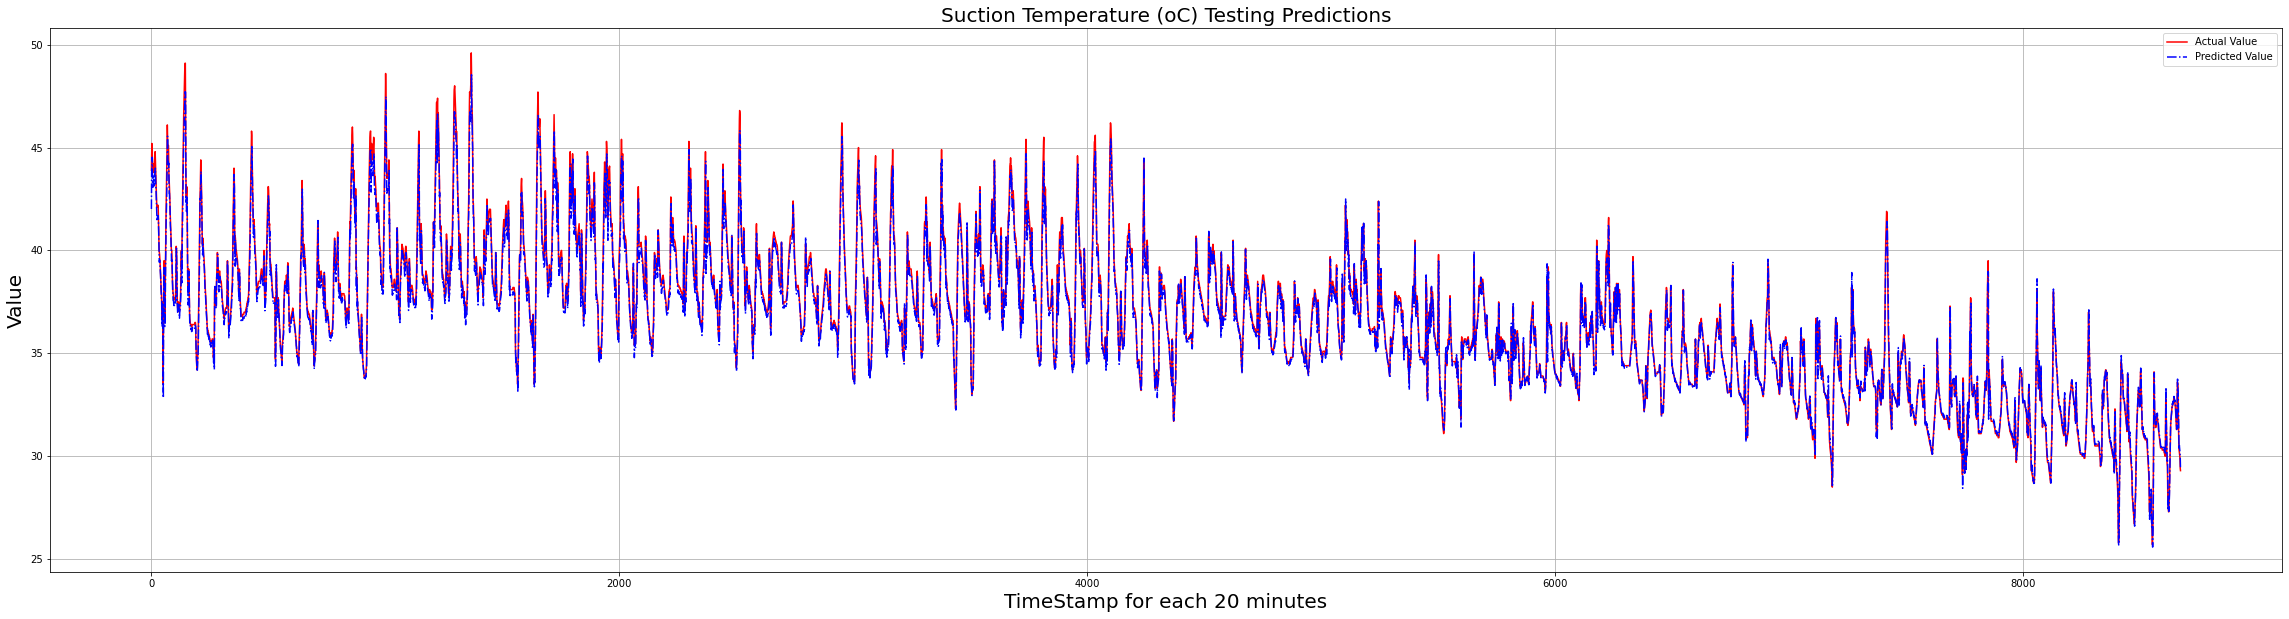

In [21]:
plt.figure(figsize=(40,10))
plt.grid()
plt.title(f"{target} Testing Predictions", fontsize=20)
plt.xlabel(f"TimeStamp for each 20 minutes", fontsize=20)
plt.ylabel(f"Value", fontsize=20)
plt.plot(fully_final[target], label='Actual Value', color='red')
plt.plot(fully_final['final_value_pred'], label='Predicted Value', color='blue', linestyle='dashdot')
plt.legend()

In [22]:
def MSE(actual, predicted):
    actual=np.array(actual)
    predicted=np.array(predicted)
    
    SE = (actual - predicted) ** 2
    MSE = np.mean(SE)
    
    return MSE

In [23]:
mean_squared_error=MSE(fully_final[target], fully_final['final_value_pred'])
print(f"The Mean Squared Error after calculating the Multivariative LSTM Model for the {target} is {round(mean_squared_error, 2)}")

The Mean Squared Error after calculating the Multivariative LSTM Model for the Suction Temperature (oC) is 0.2
